# Data Preperation

## Data Expolration

Load and assign column names to Covertype dataset (no header in CSV)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('covtype.csv')

import pandas as pd

# List all your column names as a Python list (same order as CSV columns)
columns = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
    'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
    # 40 soil type columns:
    'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
    'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
    'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
    'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
    'Cover_Type'
]

# Read CSV without headers
df = pd.read_csv('covtype.csv', header=None)

# Assign column names
df.columns = columns

print("\nFirst 5 rows:\n", df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
0       2596      51      3                               258  \
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
0                               0                              510  \
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm   
0            221             232            148  \
1            220             235            151   
2            234             238   

Basic Dataset Info, Data Types, Statistics, and Missing Values Check

In [5]:
# Show basic info
print("Shape:", df.shape)
print("\nCount of columns by data type:")
print(df.dtypes.value_counts())

# Summary statistics for numeric columns
print("\nSummary statistics:\n", df.describe())

# Check for missing values per column
missing_counts = df.isnull().sum()
if missing_counts.sum() == 0:
    print("\nNo missing values found.")
else:
    print(f"\nTotal missing values: {missing_counts.sum()}")
    # Find rows with any missing values
    missing_rows = df[df.isnull().any(axis=1)]
    print("\nRows with missing values:")
    print(missing_rows)


Shape: (581012, 55)

Count of columns by data type:
int64    55
Name: count, dtype: int64

Summary statistics:
            Elevation         Aspect          Slope   
count  581012.000000  581012.000000  581012.000000  \
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology   
count                     581012.000000                   581012.000000  \
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                       

Exploratory Data Analysis: Feature Distributions, Correlations, and Target Distribution

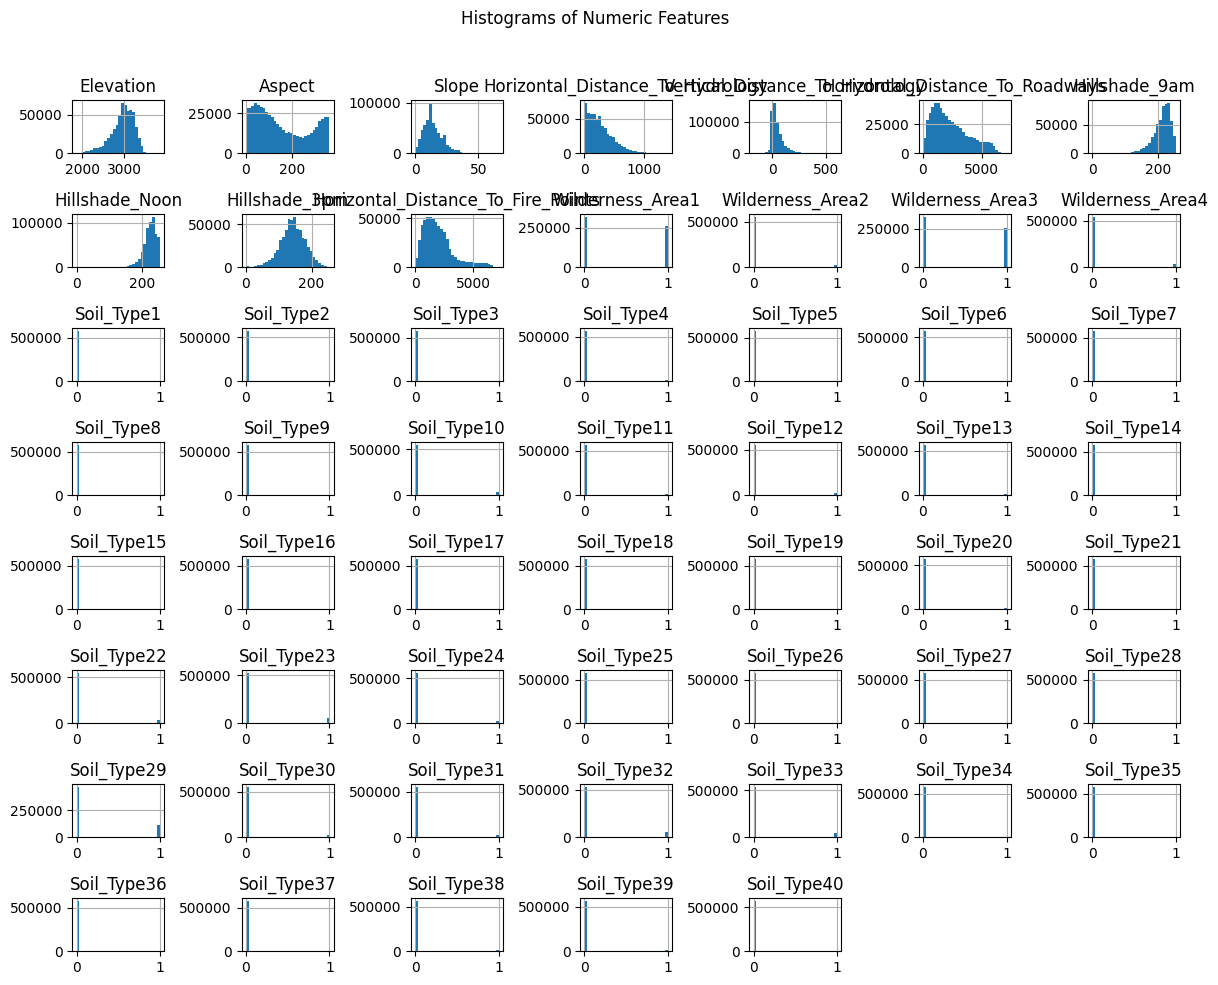

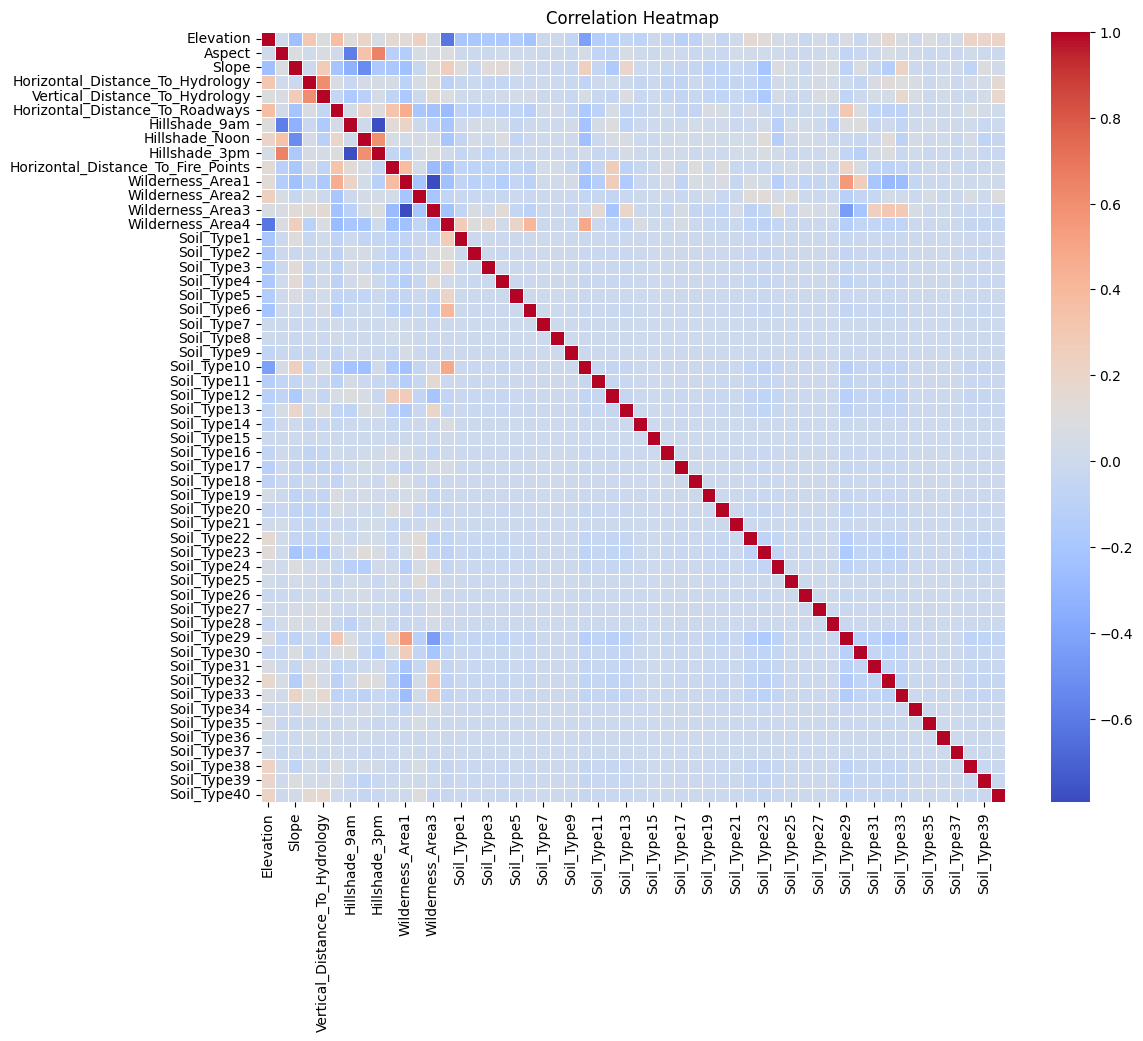

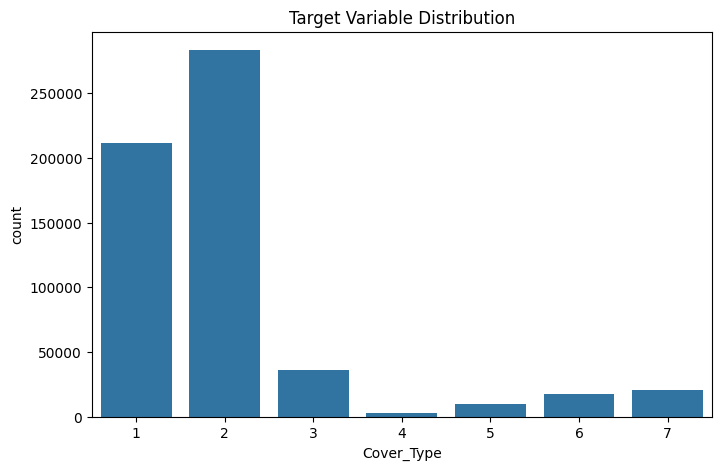

In [ ]:
# Distribution of target variable (knowing last column is target)
target_col = df.columns[-1]

# All columns except the last (target)
numeric_cols = df.columns[:-1]

df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of All Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Countplot for target classes
plt.figure(figsize=(8, 5))
sns.countplot(x=target_col, data=df)
plt.title('Target Variable Distribution')
plt.show()

## Normalization of Quantitative Features

Feature Scaling: Min-Max Normalization of Quantitative Features

In [8]:
from sklearn.preprocessing import MinMaxScaler

# List of first 10 quantitative feature names
quant_cols = columns[:10]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform only the first 10 columns
df[quant_cols] = scaler.fit_transform(df[quant_cols])

# Preview scaled data
print(df[quant_cols].head())

df = df.drop(columns=['Cover_Type'])

# Save to new CSV file
df.to_csv('covtype_processed.csv', index=False)


   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology   
0   0.368684  0.141667  0.045455                          0.184681  \
1   0.365683  0.155556  0.030303                          0.151754   
2   0.472736  0.386111  0.136364                          0.191840   
3   0.463232  0.430556  0.272727                          0.173228   
4   0.368184  0.125000  0.030303                          0.109520   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
0                        0.223514                         0.071659  \
1                        0.215762                         0.054798   
2                        0.307494                         0.446817   
3                        0.375969                         0.434172   
4                        0.222222                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm   
0       0.870079        0.913386       0.582677  \
1       0.866142        0.925197       0.594488   
2    